## Data from the BLS
The following data is from the Bureau of Labor Statistics. It tracks employment numbers (in thousands) based off of payroll. As of the time this notebook was published, the BLS data covers up to April of 2018.

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

bls_all = pd.read_csv("https://raw.githubusercontent.com/jakekara/bls-employment/master/ALL-1991-2018.csv")
bls_all.head()

,Unnamed: 0,1991-01,1991-02,1991-03,1991-04,1991-05,1991-06,1991-07,1991-08,1991-09,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,fips,fips_chk,state,state_chk
0,SMS01000000000000001,1648.5,1643.6,1645.8,1646.0,1646.8,1647.6,1653.9,1654.9,1656.1,...,2020.0,2020.2,2025.8,2029.7,2030.3,2034.6,1,1,AL,AL
1,SMS02000000000000001,241.7,241.4,241.1,241.3,242.4,241.6,243.1,242.8,242.9,...,326.5,326.5,327.7,329.0,329.0,328.8,2,2,AK,AK
2,SMS04000000000000001,1497.0,1492.8,1491.9,1487.5,1485.3,1488.2,1485.1,1486.9,1488.6,...,2791.0,2795.1,2803.5,2813.4,2818.4,2823.4,4,4,AZ,AZ
3,SMS05000000000000001,924.8,927.8,931.1,931.4,930.7,934.9,937.5,940.4,942.4,...,1241.9,1239.0,1239.9,1241.2,1244.6,1243.1,5,5,AR,AR
4,SMS06000000000000001,12520.6,12475.3,12434.6,12446.5,12415.7,12396.4,12403.2,12389.4,12378.1,...,16967.9,17002.9,17051.8,17053.0,17058.4,17097.7,6,6,CA,CA


### Which states have NOT "recovered" the employment levels of 2008-01?
That is, which states have not met or exceeded the same employment numbers they had in 2008-01?

In [2]:
bls_all['recovered'] = bls_all['2018-04'] >= bls_all['2008-01']
bls_recovered = bls_all[bls_all['recovered'] == True]
print("Number of states who have recovered their 2008-01 employment counts: " + str(len(bls_recovered)))

bls_not_recovered = bls_all[bls_all['recovered'] == False]
bls_not_recovered['state']

Number of states who have recovered their 2008-01 employment counts: 47


6     CT
31    NM
48    WV
Name: state, dtype: object

Connecticut, New Mexico, and West Virginia. Let's confirm this is true:

In [3]:
ct = bls_all[bls_all['state'] == 'CT']
wv = bls_all[bls_all['state'] == 'WV']
nm = bls_all[bls_all['state'] == 'NM']

print(ct[['state', '2008-01']])
print(ct[['state', '2018-04']])

print(wv[['state', '2008-01']])
print(wv[['state', '2018-04']])

print(nm[['state', '2008-01']])
print(nm[['state', '2018-04']])

# Compare to a random state-- ID-- which should hav exceeded 2008 levels
id = bls_all[bls_all['state'] == 'ID']
print(id[['state', '2008-01']])
print(id[['state', '2018-04']])

  state  2008-01
6    CT   1712.3
  state  2018-04
6    CT   1687.1
   state  2008-01
48    WV    763.6
   state  2018-04
48    WV    749.7
   state  2008-01
31    NM    847.3
   state  2018-04
31    NM    841.0
   state  2008-01
12    ID    653.7
   state  2018-04
12    ID    734.7


### Graphing national trends for employment numbers, 2008-2018

You can access national employment statistics for any range of time here: https://data.bls.gov/timeseries/CES0000000001

In [4]:
# We will use BLS national statistics (not state statistics). See link above.
bls_n = pd.read_excel("data/SeriesReport-20180607091841_5ccc22.xlsx")

bls_n.head(15)

,"Employment, Hours, and Earnings from the Current Employment Statistics survey (National)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,CES0000000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series Title:,"All employees, thousands, total nonfarm, seaso...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Super Sector:,Total nonfarm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Industry:,Total nonfarm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NAICS Code:,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Data Type:,"ALL EMPLOYEES, THOUSANDS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Years:,2008 to 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# First 11 rows are not what we need
bls_n = bls_n[12:]
bls_n.columns = ["Year", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
                "November", "December"]

# Calculate average employment numbers for the nation each year
bls_n["Year_Average"] = (bls_n["January"] + bls_n["February"] + bls_n["March"] + bls_n["April"] + bls_n["May"]\
                                    + bls_n["June"] + bls_n["July"] + bls_n["August"] + bls_n["September"]\
                                    + bls_n["October"] + bls_n["November"] + bls_n["December"])\
                                    / 12.0

bls_n.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Year_Average
12,2008,138419,138338,138283,138054,137870,137716,137503,137226,136783,136308,135549,134842,137241
13,2009,134055,133351,132549,131845,131491,131022,130680,130484,130255,130046,130058,129781,131301
14,2010,129799,129726,129919,130140,130662,130522,130444,130428,130365,130632,130761,130834,130353
15,2011,130878,131060,131314,131637,131718,131952,132024,132136,132369,132578,132723,132924,131943
16,2012,133272,133505,133769,133841,133958,134026,134182,134355,134549,134702,134832,135075,134172


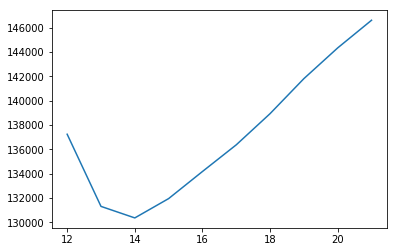

In [6]:
bls_n.Year_Average.plot()

So it looks like the nation as a whole has more than recovered employment numbers. Is this the case for CT?

### Graphing CT trend for employment numbers, 2008-2018

In [7]:
ct_by_mo = ct.transpose()
ct_by_mo

,6
Unnamed: 0,SMS09000000000000001
1991-01,1585.7
1991-02,1573.8
1991-03,1571.5
1991-04,1568.5
1991-05,1562.1
1991-06,1561
1991-07,1550.2
1991-08,1546
1991-09,1545


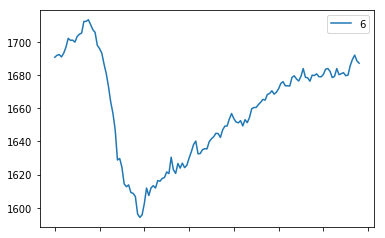

In [8]:
# Take off the first row and last 5 rows (not part of our time series)
ct_by_mo = ct_by_mo[1:]
ct_by_mo = ct_by_mo[0:-5]

# I don't know when the pre-recession peak occurred exactly, so I'll start looking for it at January 2007.
# Thats 2007 - 1991 = 16 years * 12 months = 192 rows we don't want 
ct_by_mo = ct_by_mo[191:]

ct_by_mo.plot()

It looks like CT has not seen a full job recovery since 2008. In fact, it seems to be going down.

In [9]:
ct_by_mo.tail(6)

,6
2017-11,1679.9
2017-12,1685.6
2018-01,1689.4
2018-02,1692
2018-03,1688.5
2018-04,1687.1


It looks like CT numbers have been decreasing for the last two months. This seems to be pretty common given the graph above. But how many jobs are we looking at?

In [10]:
ct_3_mo = ct_by_mo.tail(3)
feb_to_apr_loss = (ct_3_mo.iloc[0] - ct_3_mo.iloc[2]) * 1000
print("Jobs lost 2/18 to 4/18: " + str(feb_to_apr_loss))

Jobs lost 2/18 to 4/18: 6    4900
dtype: object
